<a href="https://colab.research.google.com/github/LakshmiPrasannaAvula/FMML-LABS-AND-ASSIGNMENTS/blob/main/Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

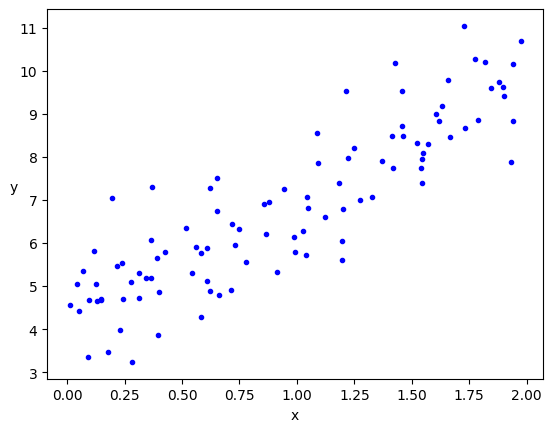

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

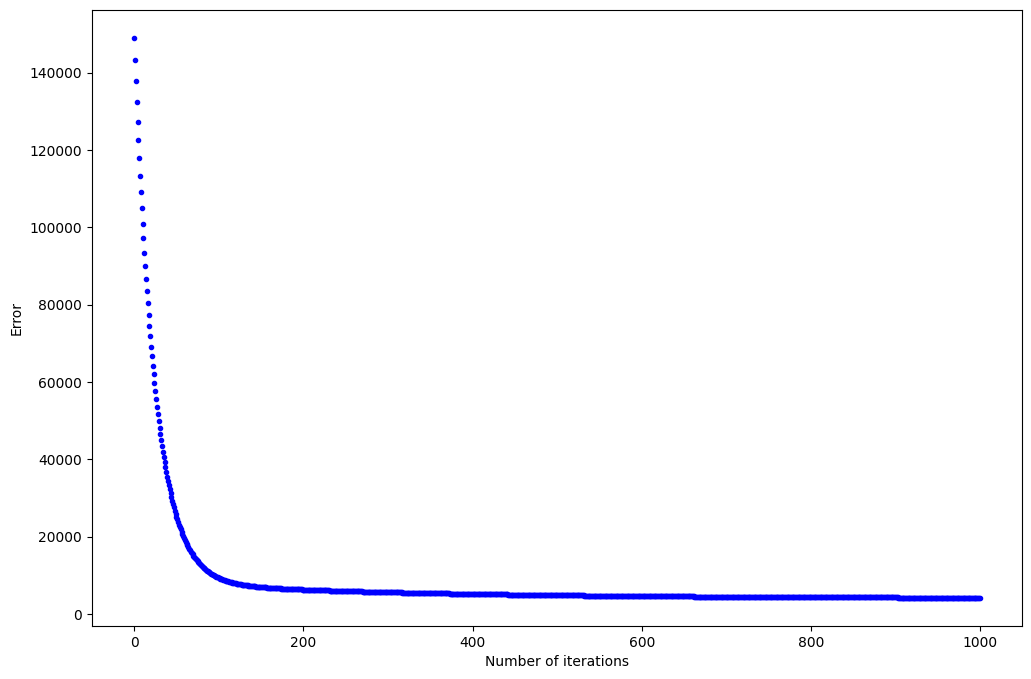

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

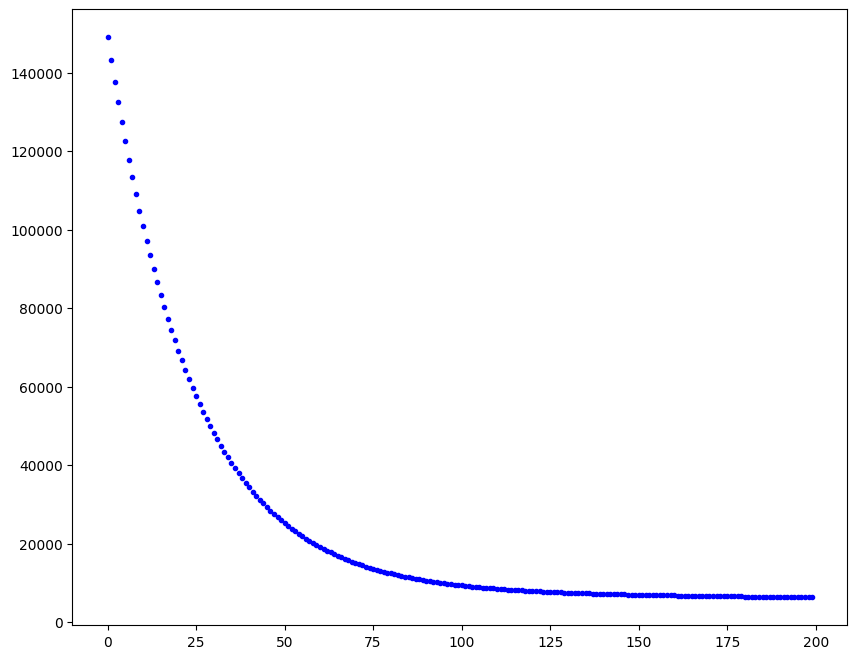

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


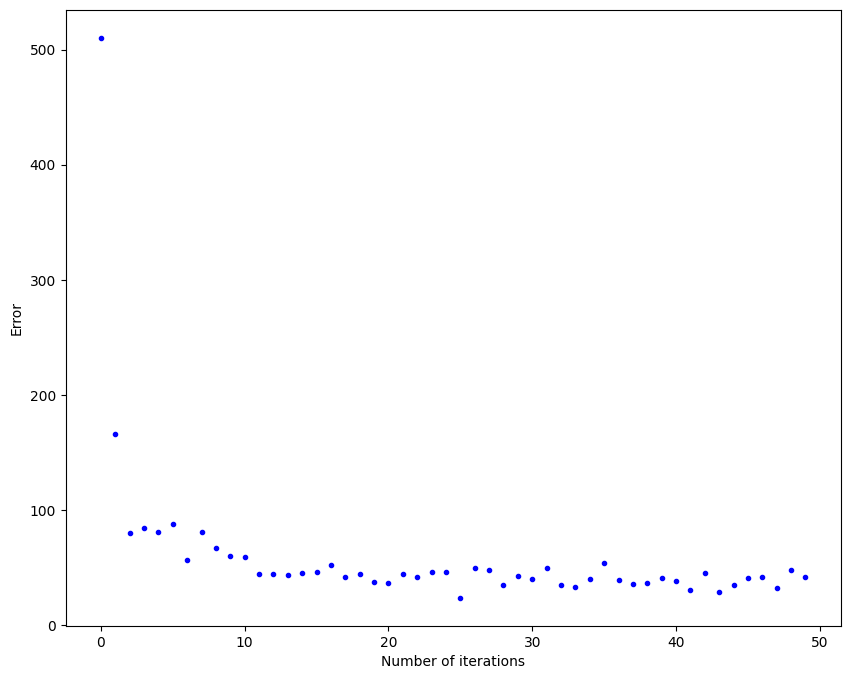

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


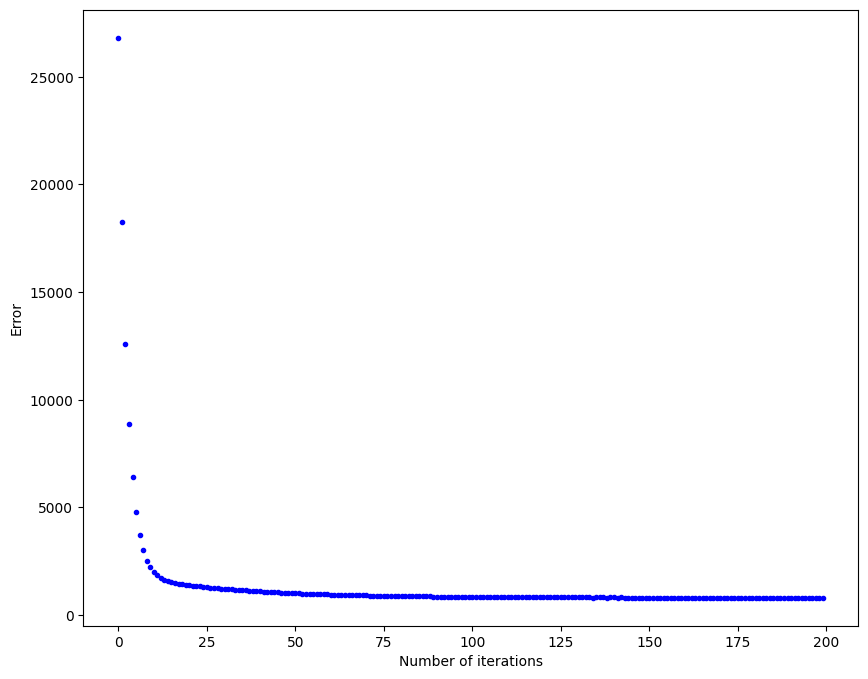

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

ANSWERS:

1. the batch size in Mini-Batch Gradient Descent using Python, TensorFlow, and Matplotlib. The code will demonstrate the effect of different batch sizes on the convergence of a simple neural network.

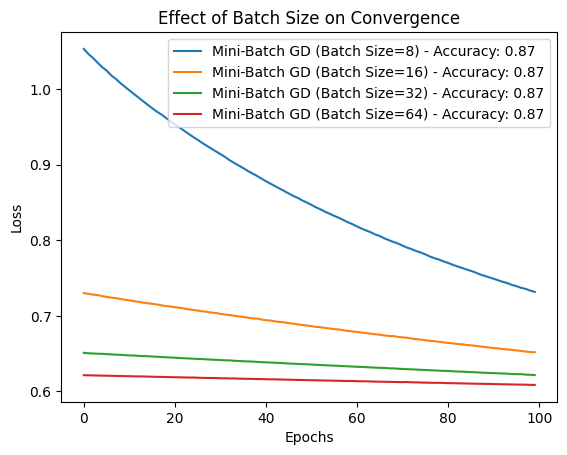

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better convergence
X_train /= X_train.max(axis=0)
X_test /= X_test.max(axis=0)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define a simple neural network model
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(4,)))

# Learning rates to compare
batch_sizes = [8, 16, 32, 64]

# Plot the effects of changing batch sizes
for batch_size in batch_sizes:
    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=batch_size, verbose=0)
    accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]

    # Plot learning curves for each batch size
    plt.plot(history.history['loss'], label=f'Mini-Batch GD (Batch Size={batch_size}) - Accuracy: {accuracy:.2f}')

plt.title('Effect of Batch Size on Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2.Full Batch Gradient Descent:

Utilizes the entire training dataset for each iteration.
Provides accurate gradient estimates but can be computationally expensive, especially for large datasets.
Mini-Batch Gradient Descent:

Randomly selects a subset (batch) of the training data for each iteration.
Strikes a balance between full batch and stochastic gradient descent.
Reduces computational requirements and adds a level of noise to the optimization process.
Stochastic Gradient Descent:

Uses a single random training example for each iteration.
Introduces the most noise but can converge faster due to frequent updates.
Prone to more oscillations but can escape shallow local minima.

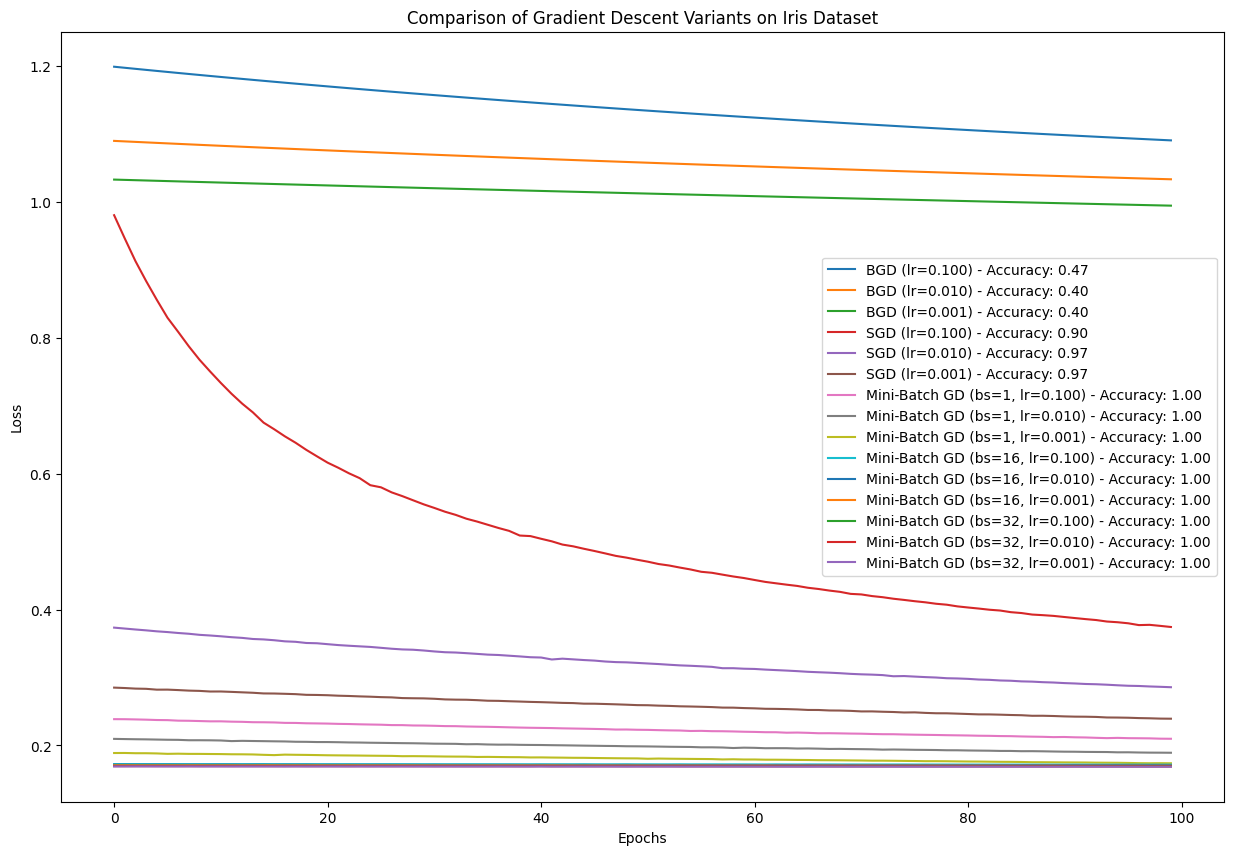

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better convergence
X_train /= X_train.max(axis=0)
X_test /= X_test.max(axis=0)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define a simple neural network model
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(4,)))

# Learning rates to compare
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [1, 16, 32]  # Different batch sizes for Mini-Batch GD

# Plot the effects of changing learning rates and batch sizes
plt.figure(figsize=(15, 10))

# Test Batch Gradient Descent
for lr in learning_rates:
    model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=len(X_train), verbose=0)
    accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
    plt.plot(history.history['loss'], label=f'BGD (lr={lr:.3f}) - Accuracy: {accuracy:.2f}')

# Test Stochastic Gradient Descent
for lr in learning_rates:
    model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=1, verbose=0)
    accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
    plt.plot(history.history['loss'], label=f'SGD (lr={lr:.3f}) - Accuracy: {accuracy:.2f}')

# Test Mini-Batch Gradient Descent
for batch_size in batch_sizes:
    for lr in learning_rates:
        model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=batch_size, verbose=0)
        accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)[1]
        plt.plot(history.history['loss'], label=f'Mini-Batch GD (bs={batch_size}, lr={lr:.3f}) - Accuracy: {accuracy:.2f}')

plt.title('Comparison of Gradient Descent Variants on Iris Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


3.Batch Gradient Descent (BGD):

Utilizes the entire training dataset to compute the gradient and update parameters.
Learning rate affects the size of the steps taken towards the minimum during each iteration.
If the learning rate is too large, it may cause overshooting, while too small a learning rate may result in slow convergence.
Stochastic Gradient Descent (SGD):

Uses a single random training example for each iteration.
Learning rate impacts the step size for individual training examples.
More sensitive to learning rate changes, and a proper learning rate is crucial for stable convergence.
Mini-Batch Gradient Descent:

Strikes a balance between BGD and SGD by using a randomly selected subset (batch) of the training data.
Learning rate affects the step size for each mini-batch.
Typically offers a good compromise between the robustness of BGD and the faster convergence of SGD.

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


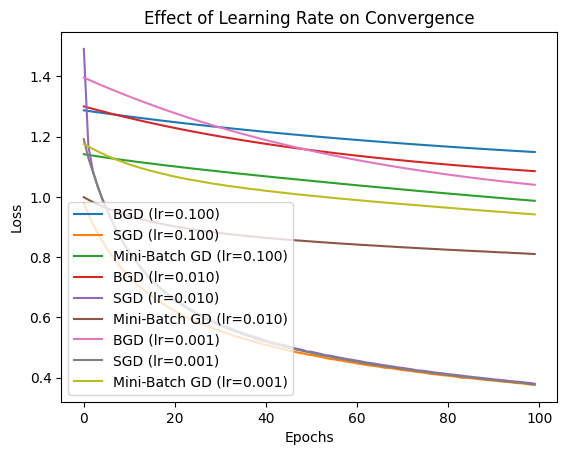

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better convergence
X_train /= X_train.max(axis=0)
X_test /= X_test.max(axis=0)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define a simple neural network model
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(4,)))

# Learning rates to compare
learning_rates = [0.1, 0.01, 0.001]

# Plot the effects of changing learning rates
for lr in learning_rates:
    # BGD
    bgd_model = Sequential()
    bgd_model.add(Dense(3, activation='softmax', input_shape=(4,)))
    bgd_model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    bgd_history = bgd_model.fit(X_train, y_train_one_hot, epochs=100, batch_size=len(X_train), verbose=0)
    bgd_accuracy = accuracy_score(y_test, np.argmax(bgd_model.predict(X_test), axis=1))

    # SGD
    sgd_model = Sequential()
    sgd_model.add(Dense(3, activation='softmax', input_shape=(4,)))
    sgd_model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    sgd_history = sgd_model.fit(X_train, y_train_one_hot, epochs=100, batch_size=1, verbose=0)
    sgd_accuracy = accuracy_score(y_test, np.argmax(sgd_model.predict(X_test), axis=1))

    # Mini-Batch GD
    minibatch_model = Sequential()
    minibatch_model.add(Dense(3, activation='softmax', input_shape=(4,)))
    minibatch_model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    minibatch_history = minibatch_model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32, verbose=0)
    minibatch_accuracy = accuracy_score(y_test, np.argmax(minibatch_model.predict(X_test), axis=1))

    # Plot learning curves for each learning rate
    plt.plot(bgd_history.history['loss'], label=f'BGD (lr={lr:.3f})')
    plt.plot(sgd_history.history['loss'], label=f'SGD (lr={lr:.3f})')
    plt.plot(minibatch_history.history['loss'], label=f'Mini-Batch GD (lr={lr:.3f})')

plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
